In [1]:
import torch
torch.__version__

'2.5.1+cu124'

In [2]:
scalar = torch.tensor(7)
scalar

tensor(7)

In [3]:
scalar.item()

7

In [4]:
MATRIX= torch.tensor([[7,8],[9,10]])

In [5]:
rand_tensor=torch.rand(size=(3,4))
rand_tensor, rand_tensor.dtype

(tensor([[0.7586, 0.9354, 0.6536, 0.3595],
         [0.2990, 0.4072, 0.6096, 0.5824],
         [0.9097, 0.5546, 0.5124, 0.4885]]),
 torch.float32)

In [6]:
zero_to_ten = torch.range(0,10)
ztt = torch.arange(start=0,end=10,step=1)
ztt

<ipython-input-6-b7430dc69494>:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  zero_to_ten = torch.range(0,10)


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### NN implementation

In [7]:
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

In [8]:
torch.manual_seed(42)
linear = torch.nn.Linear(in_features=2,out_features=6)

x = tensor_A
output = linear(x)
print(f"\nInput shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")


Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


In [9]:
x = torch.arange(12,dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [10]:
x.numel()

12

In [11]:
x.shape
X = x.reshape(3,4)

In [12]:
torch.tensor([[2,1,4,5],[1,2,3,4],[4,5,2,1]])

tensor([[2, 1, 4, 5],
        [1, 2, 3, 4],
        [4, 5, 2, 1]])

In [13]:
X[-1],X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [14]:
torch.exp(x)

tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03, 2.2026e+04, 5.9874e+04])

In [15]:
x = torch.tensor([1.0,2,4,8])
y= torch.tensor([2,2,2,2])

x+y,x-y,x*y,x/y,x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [16]:
X = torch.arange(12,dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])

torch.cat((X,Y),dim=0),torch.cat((X,Y),dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

Broadcasting


In [17]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a,b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [18]:
a+b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

Saving Memory


In [19]:
before = id(Y)
Y = Y+X
id(Y) == before

False

In [20]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X+Y
print('id(Z):', id(Z))

id(Z): 132066977284272
id(Z): 132066977284272


In [21]:
A =  X.numpy()
B = torch.from_numpy(A)
type(A),type(B)

(numpy.ndarray, torch.Tensor)

### Data Preprocessing

In [22]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
dfile = os.path.join('..', 'data', 'house_tiny.csv')
with open(dfile, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [23]:
import pandas as pd

data = pd.read_csv(dfile)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


In [24]:
inputs,targets = data.iloc[:,0:2], data.iloc[:,2]
inputs= pd.get_dummies(inputs,dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [25]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


In [26]:
# conversion to tensor format
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X,y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

## Linar Algebra

In [27]:
import torch

In [28]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x+y,x*y,x/y,x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

#### Vectors

In [29]:
x = torch.arange(3)
x

tensor([0, 1, 2])

### Matrices

In [30]:
A = torch.arange(6).reshape(3,2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [31]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [32]:
A = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [33]:
A = torch.arange(6,dtype=torch.float32).reshape(2,3)
B = A.clone()
A , A+B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [34]:
a = 2
X = torch.arange(24).reshape(2,3,4)
a + X, (a*X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

#### Reduction

In [35]:
x = torch.arange(3, dtype=torch.float32 )
x,x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [36]:
A.shape , A.sum(axis =  1).shape

(torch.Size([2, 3]), torch.Size([2]))

In [37]:
A.sum(axis=[0,1]) == A.sum()

tensor(True)

In [38]:
A.mean(), A.sum()/A.numel()

(tensor(2.5000), tensor(2.5000))

In [39]:
A.mean(axis=0), A.sum(axis=0)/A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

#### M-M Multiplication

In [40]:
B = torch.ones(3,4)
torch.mm(A,B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

In [41]:
u = torch.tensor([3.0,-4.0])
torch.norm(u)

tensor(5.)

#### Calculus

In [42]:
!pip install d2l

In [43]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

In [44]:
def f(x):
  return 3*x**2 - 4*x

In [45]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


#### Visualization Utilitis

In [46]:
def use_svg_display():
  backend_inline.set_matplotlib_formats('svg')

In [47]:
def set_figsize(figsize=(3.5, 2.5)):
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

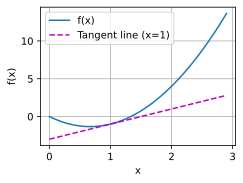

In [48]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])


## Automatic Differntiation

In [49]:
import torch

In [50]:
x = torch.arange(4.0)
print(x)
x.requires_grad_(True)
x.grad

tensor([0., 1., 2., 3.])


In [51]:
y = 2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [52]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [53]:
def f(a):
  b = a*2
  while b.norm() < 1000:
    b = b * 2
  if b.sum() > 0:
    c = b
  else:
    c = 100*b
  return c

In [54]:
a = torch.randn( size =() ,requires_grad= True)
d = f(a)
d.backward()

### Probability and Statistics

In [55]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l


In [59]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads,tails: ",[heads,tails])

heads,tails:  [60, 40]


In [60]:
fair_probs = torch.tensor([0.5,0.5])
Multinomial(100,fair_probs).sample()

tensor([53., 47.])

In [61]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.5000, 0.5000])

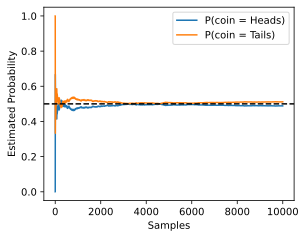

In [65]:
# visualization
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim = 0)
estimates = cum_counts / cum_counts.sum(dim = 1,keepdims= True)
estimates = estimates.numpy()

d2l.set_figsize((4.5,3.5))
d2l.plt.plot(estimates[:,0], label = ("P(coin = Heads)"))
d2l.plt.plot(estimates[:,1], label = ("P(coin = Tails)"))
d2l.plt.axhline(y = 0.5,color='black', linestyle = 'dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated Probability')
d2l.plt.legend()